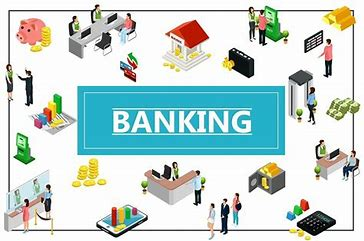

Context
A Customer Credit Card Information Dataset which can be used for Identifying Loyal Customers, Customer Segmentation, Targeted Marketing and other such use cases in the Marketing Industry.

A few tasks that can be performed using this dataset is as follows:

Perform Data-Cleaning,
Preprocessing,
Visualizing and Feature Engineering on the Dataset.
Means Clustering models.


# Clustering in Machine Learning

# K means Clustering

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Loading  the Dataset

In [2]:
cred_card=pd.read_csv('Credit Card Customer Data.csv')
cred_card.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
cred_card=cred_card.drop(['Sl_No'],axis=1)
cred_card.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


# Shape

In [4]:
cred_card.shape

(660, 6)

# Columns

In [5]:
cred_card.columns

Index(['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

# Checking for Null Values

In [6]:
cred_card.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
cred_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [8]:
for i in cred_card.columns:
    print("****************************", i ,
         "******************************************")
    print()
    print(set(cred_card[i].tolist()))
    print()

**************************** Customer Key ******************************************

{71681, 77826, 79885, 96269, 75792, 90131, 81940, 43034, 28701, 45088, 16418, 65574, 96297, 14377, 94251, 20524, 49198, 67637, 26678, 90168, 38970, 88123, 32828, 14398, 36929, 36934, 69704, 61517, 90189, 90191, 79953, 18514, 73811, 38994, 22610, 55382, 77910, 18519, 20570, 47198, 84069, 14439, 82023, 57451, 20593, 36978, 57459, 51319, 24702, 96386, 77954, 18564, 20620, 26767, 88207, 37016, 53410, 18595, 30888, 12456, 28842, 24748, 63663, 18609, 78002, 69811, 49331, 71862, 55478, 94391, 61627, 49341, 47296, 16577, 98499, 41159, 71881, 96463, 39122, 65747, 65750, 57565, 63710, 73952, 39137, 84192, 59619, 94437, 24808, 69868, 82164, 65781, 76024, 63751, 59656, 49418, 88338, 67860, 96534, 80150, 45341, 35103, 65825, 16676, 96548, 22824, 98602, 53552, 41266, 22842, 94529, 67911, 41287, 92489, 16715, 47437, 35149, 69965, 61776, 92501, 33110, 92503, 49493, 88411, 51552, 74083, 92522, 65908, 39285, 12663, 884

# Count the number of unique values in each column

In [9]:

def check_unquie_count(cred_card):
    unique_counts = cred_card.nunique().sort_values()
    print('=='*30)
    print(' '*10, 'Total no. of Unique Values')
    print('=='*30)
    print(unique_counts)
    print('=='*30)

check_unquie_count(cred_card)


           Total no. of Unique Values
Total_visits_bank        6
Total_Credit_Cards      10
Total_calls_made        11
Total_visits_online     16
Avg_Credit_Limit       110
Customer Key           655
dtype: int64


<Axes: ylabel='Frequency'>

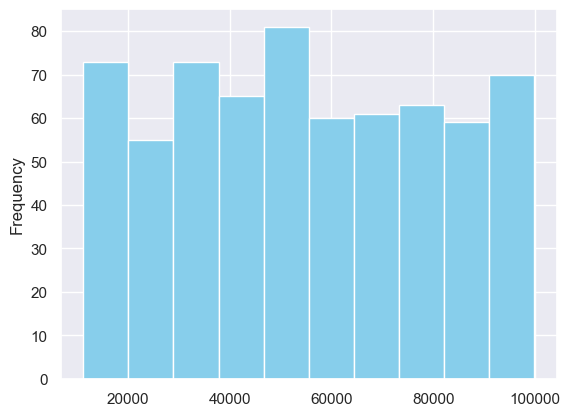

In [10]:
cred_card['Customer Key'].plot(kind='hist',color='skyblue')

<Axes: ylabel='Frequency'>

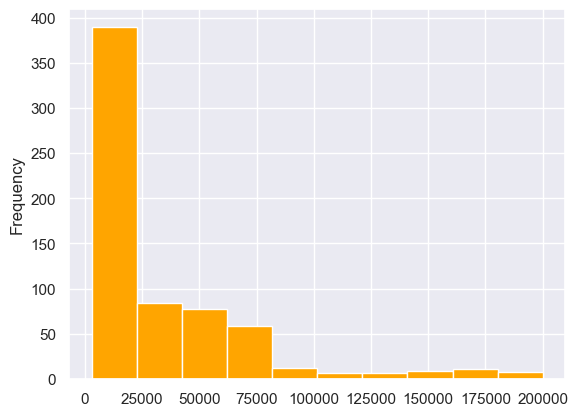

In [11]:
cred_card['Avg_Credit_Limit'].plot(kind='hist',color='orange')

<Axes: ylabel='Frequency'>

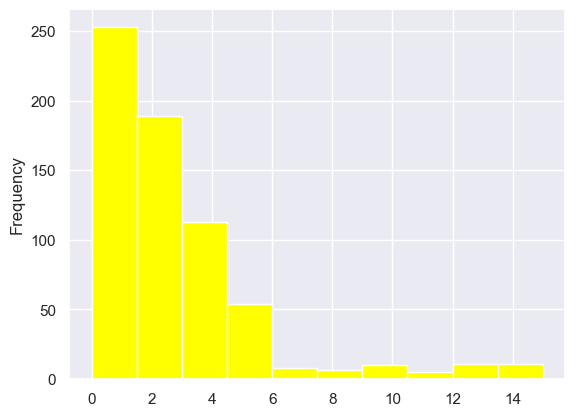

In [12]:
cred_card['Total_visits_online'].plot(kind='hist',color='yellow')

<Axes: ylabel='Frequency'>

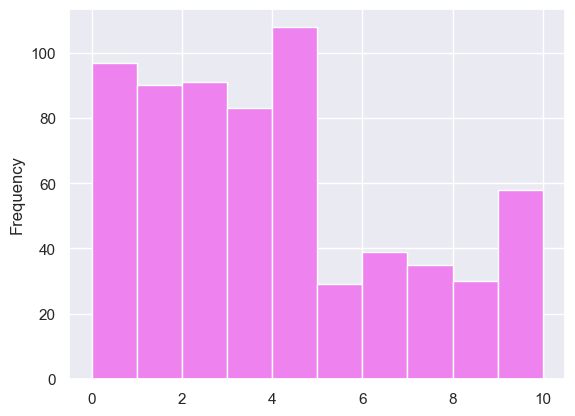

In [13]:
cred_card['Total_calls_made'].plot(kind='hist',color='violet')

<Axes: ylabel='Frequency'>

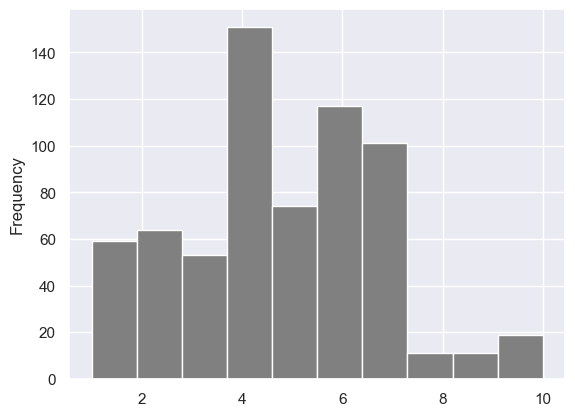

In [14]:
cred_card['Total_Credit_Cards'].plot(kind='hist',color='grey')

<Axes: ylabel='Frequency'>

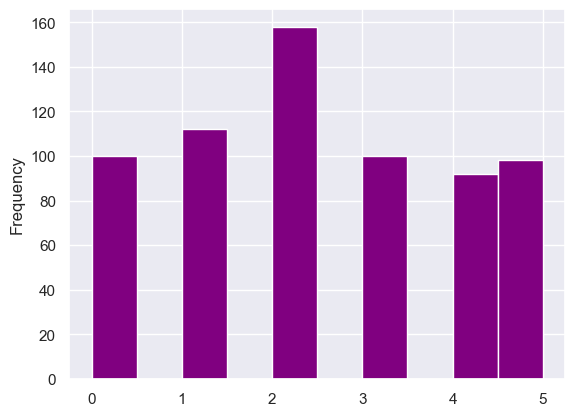

In [15]:
cred_card['Total_visits_bank'].plot(kind='hist',color='purple')

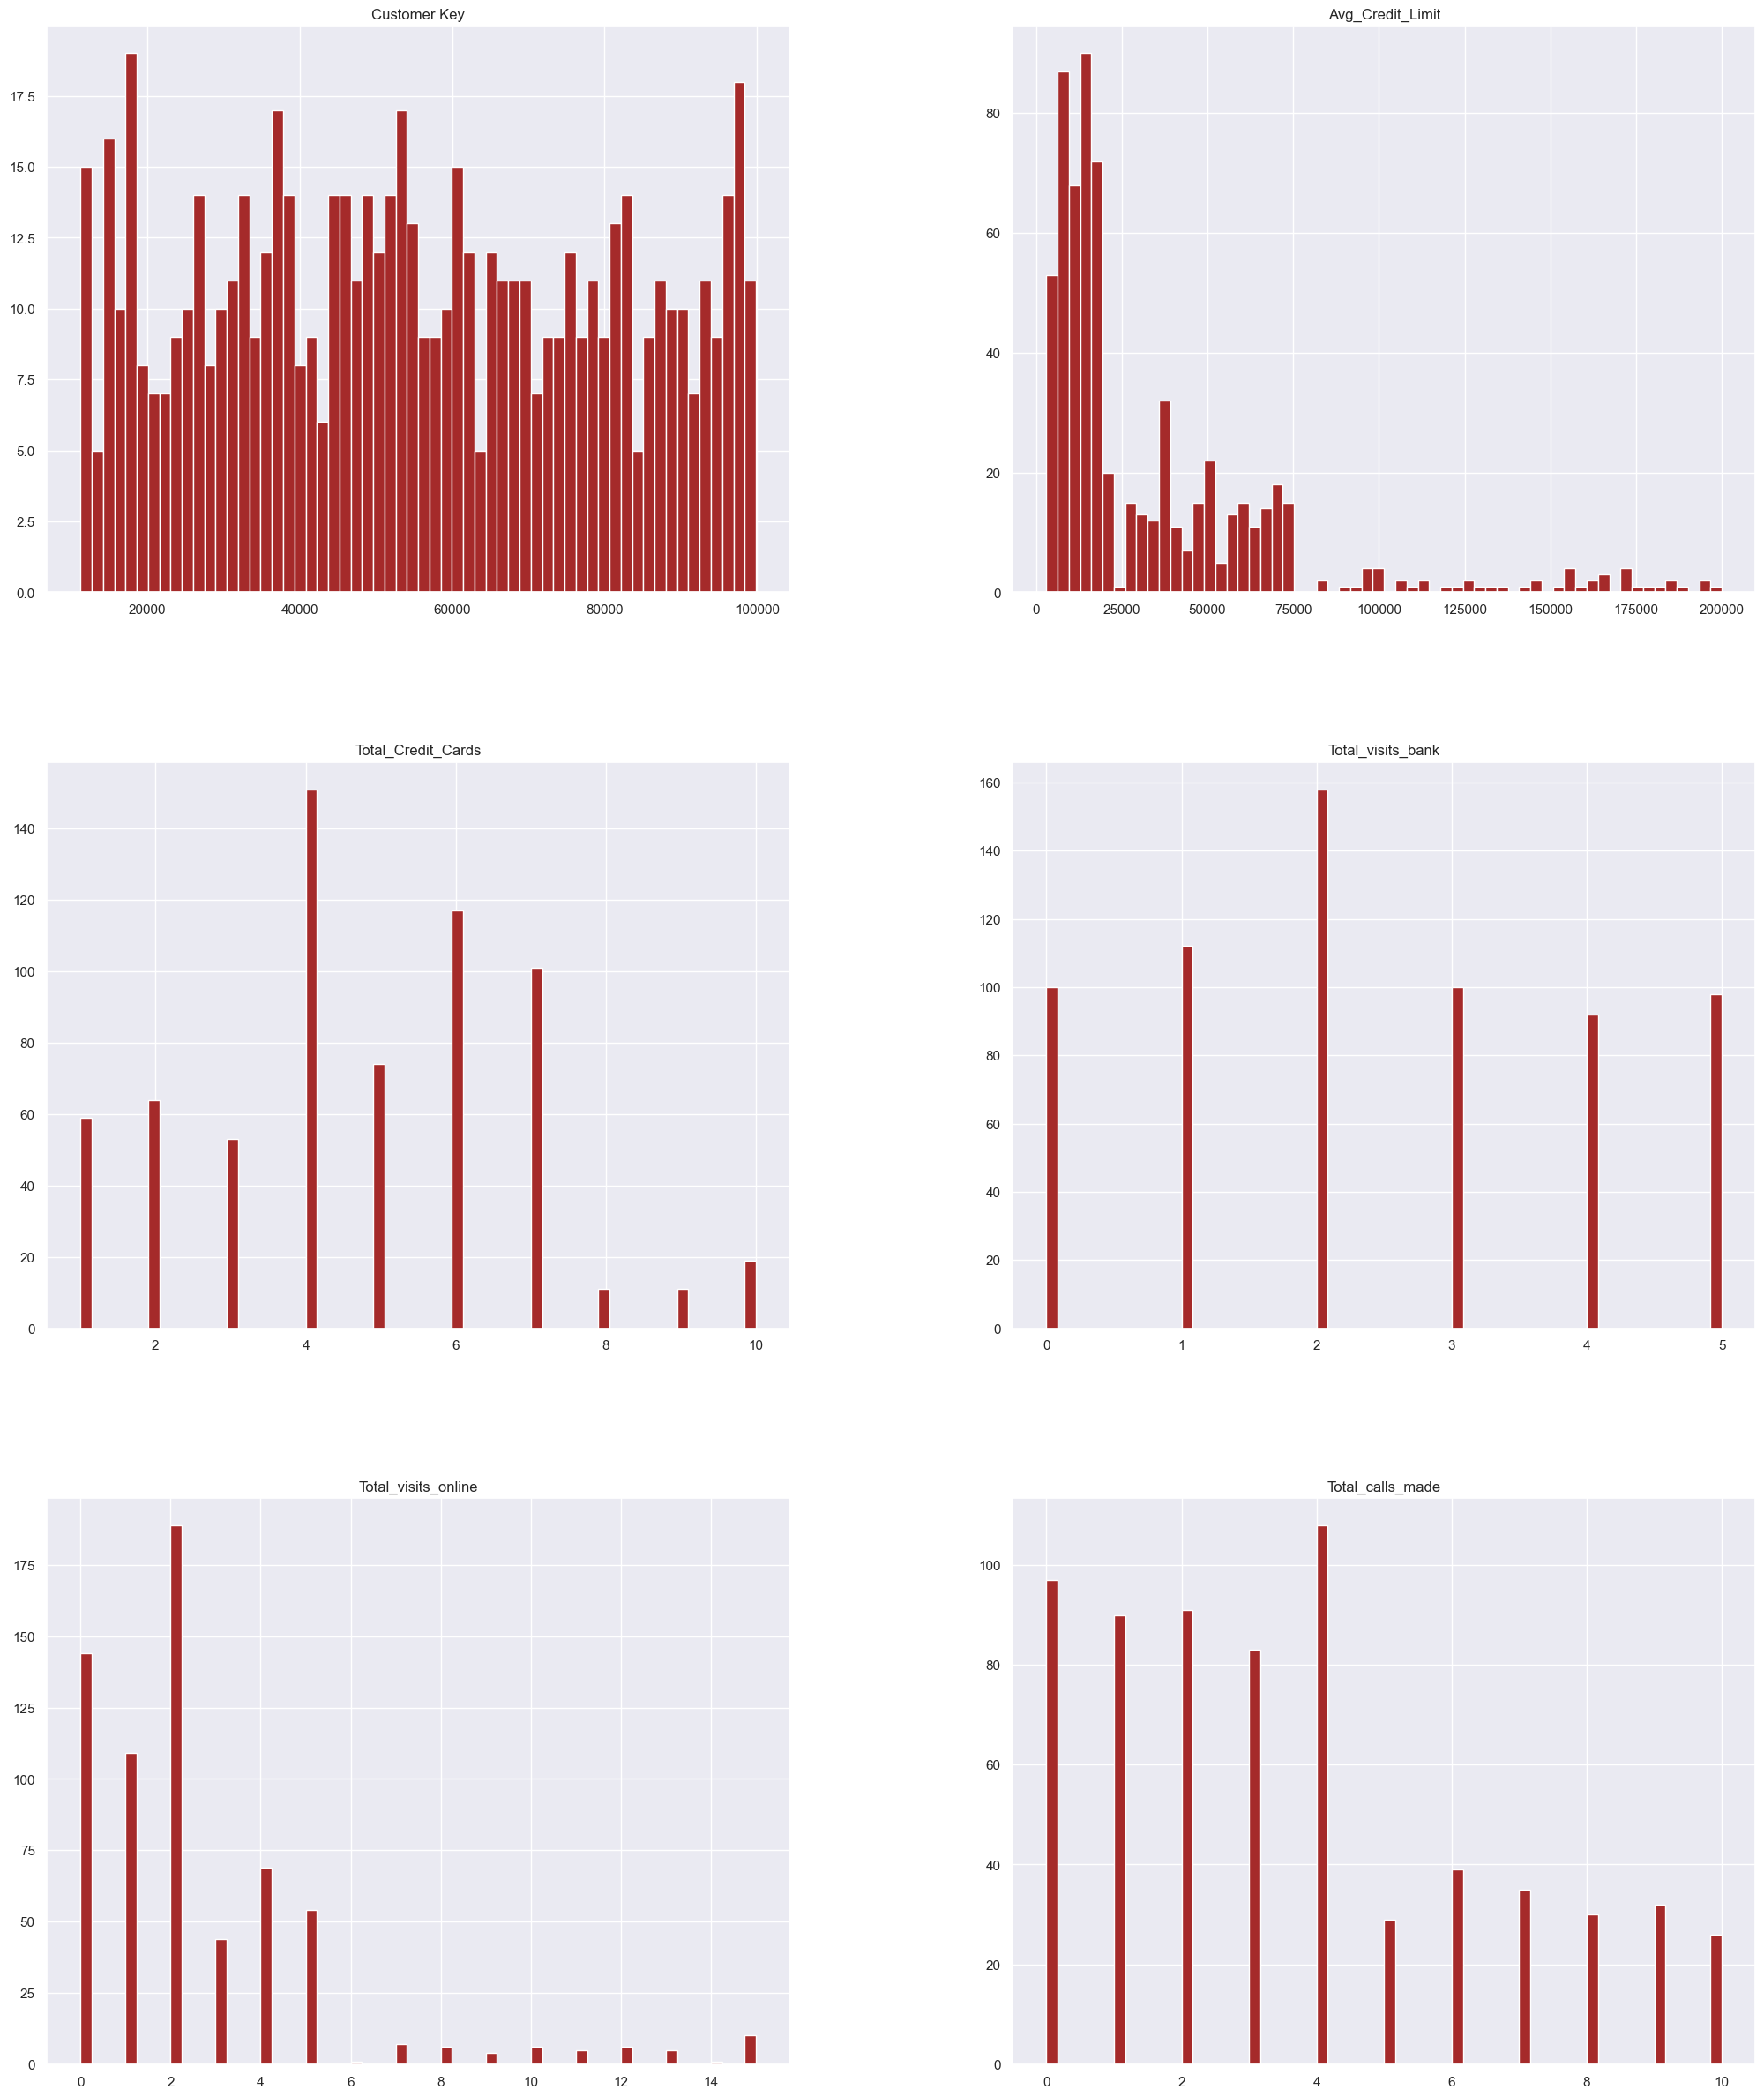

In [16]:
cred_card.hist(bins=60,figsize=(25,30),color='brown')
plt.show()

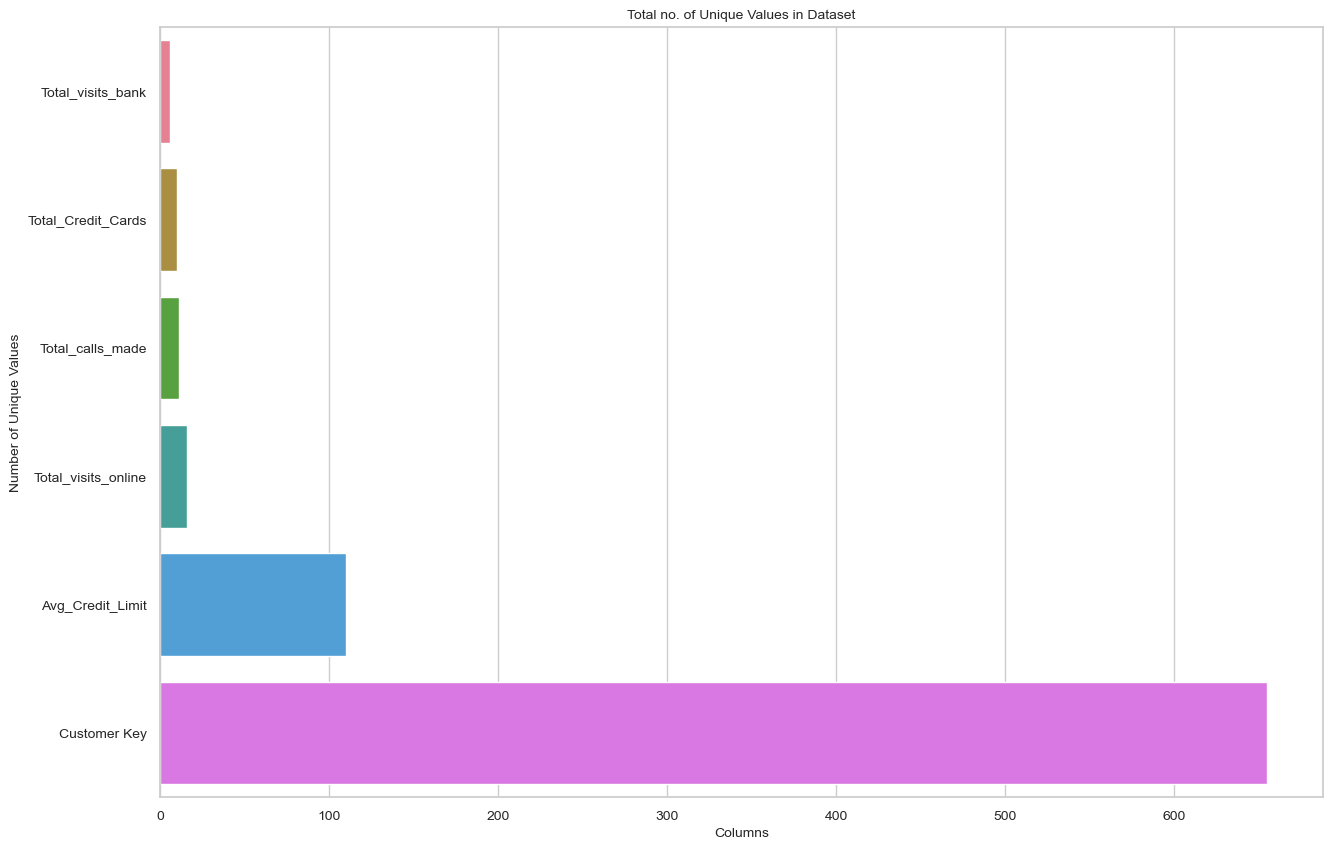

In [17]:
def check_unquie_count(cred_card):
    unique_counts = cred_card.nunique().sort_values()
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 10))
    sns.barplot(y=unique_counts.index, x=unique_counts.sort_values(),palette='husl' )
    plt.xticks(rotation=0, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Total no. of Unique Values in Dataset', fontsize=10)
# Display the plot
    plt.show()

check_unquie_count(cred_card)

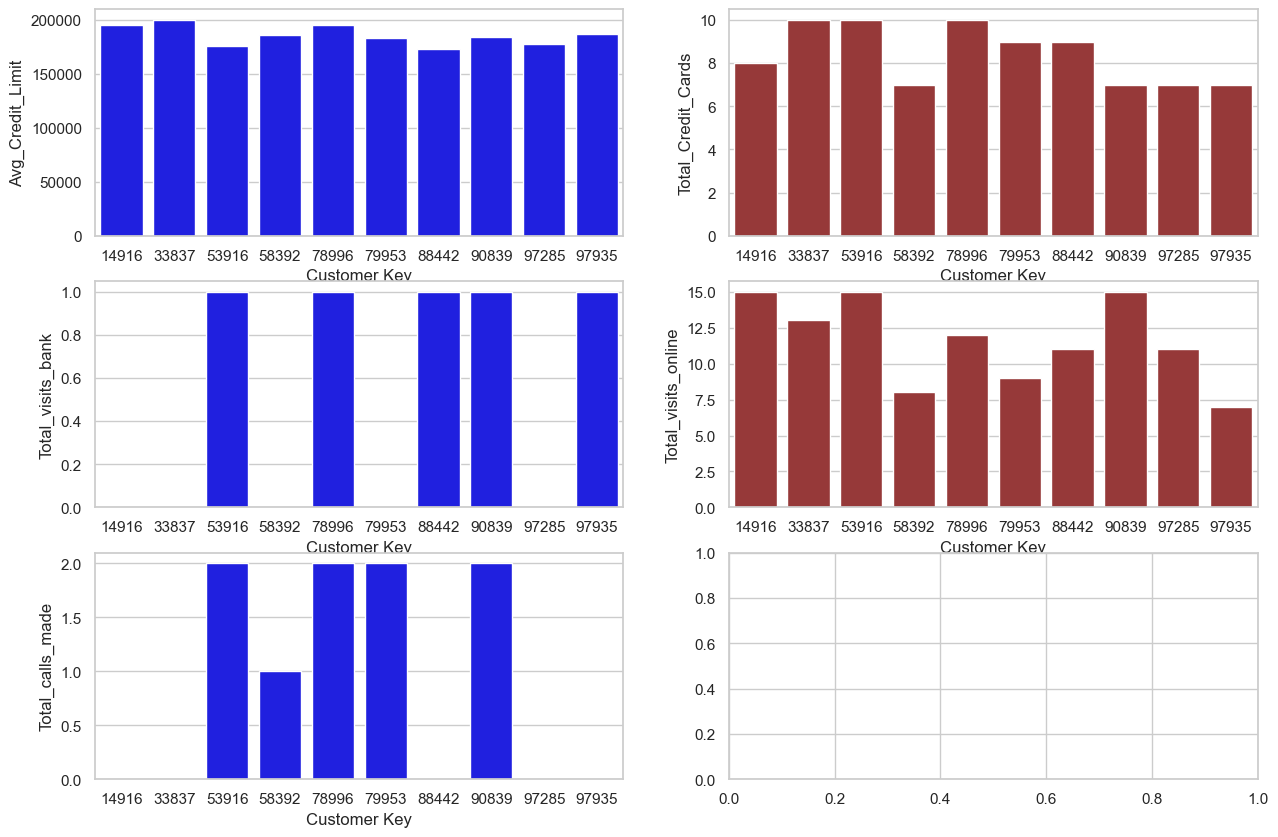

In [18]:
sorted_cred_card = cred_card.sort_values(by=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'], ascending=False)
top_10_cred_card = sorted_cred_card.head(10)

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
colors = ['blue', 'brown', 'blue', 'brown', 'blue']
sns.barplot(data=top_10_cred_card, x='Customer Key', y='Avg_Credit_Limit', ax=axes[0, 0], color=colors[0])
sns.barplot(data=top_10_cred_card, x='Customer Key', y='Total_Credit_Cards', ax=axes[0, 1], color=colors[1])
sns.barplot(data=top_10_cred_card, x='Customer Key', y='Total_visits_bank', ax=axes[1, 0], color=colors[2])
sns.barplot(data=top_10_cred_card, x='Customer Key', y='Total_visits_online', ax=axes[1, 1], color=colors[3])
sns.barplot(data=top_10_cred_card, x='Customer Key', y='Total_calls_made', ax=axes[2, 0], color=colors[4])

plt.show()

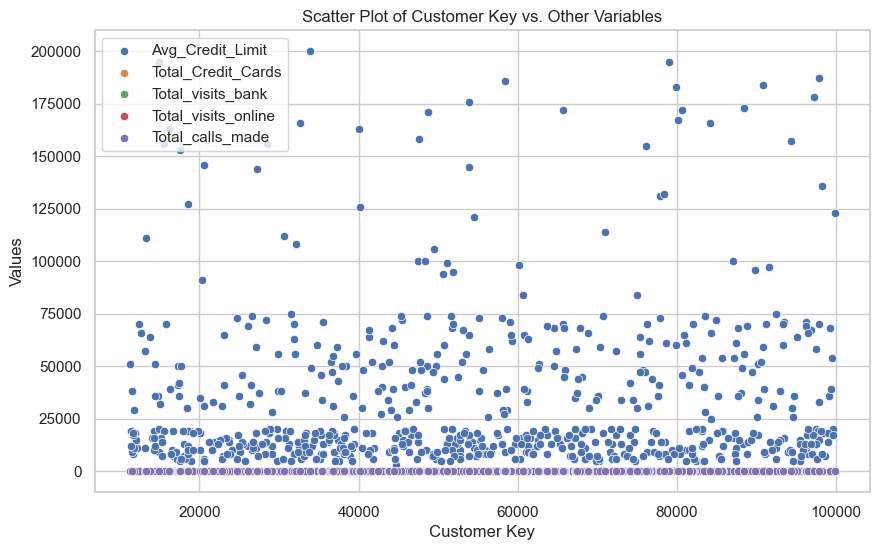

In [19]:

y_vars = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6)) 

for var in y_vars:
    sns.scatterplot(x='Customer Key', y=var, data=cred_card, label=var)

plt.xlabel('Customer Key')
plt.ylabel('Values')
plt.title('Scatter Plot of Customer Key vs. Other Variables')
plt.legend()  
plt.show()

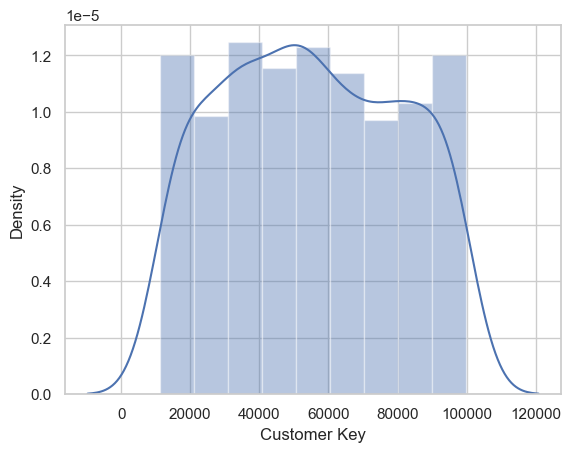

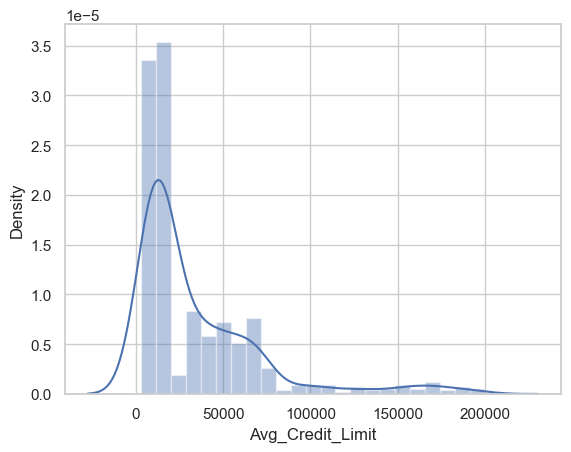

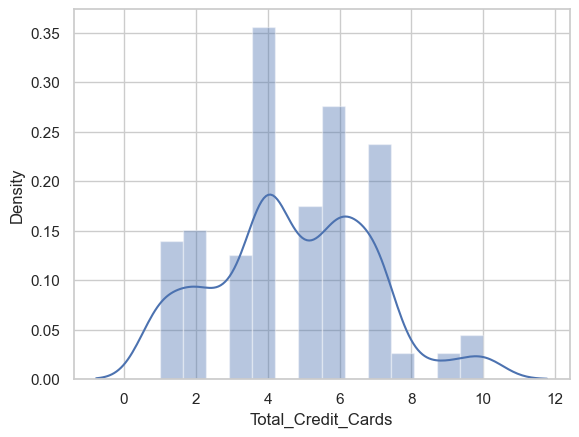

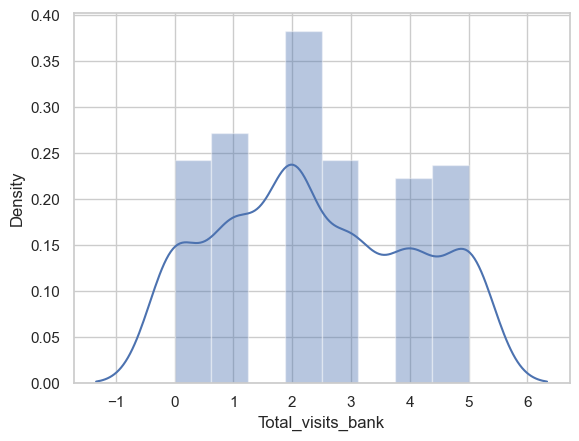

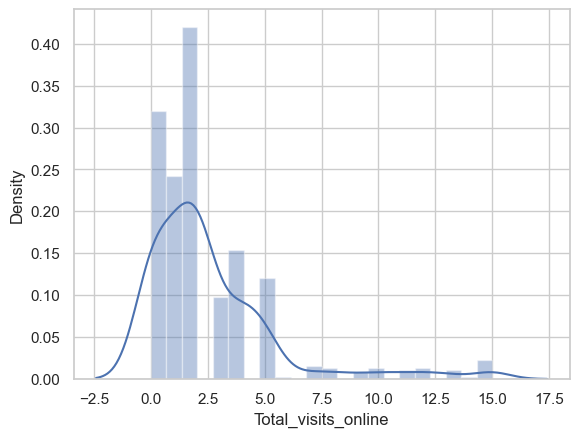

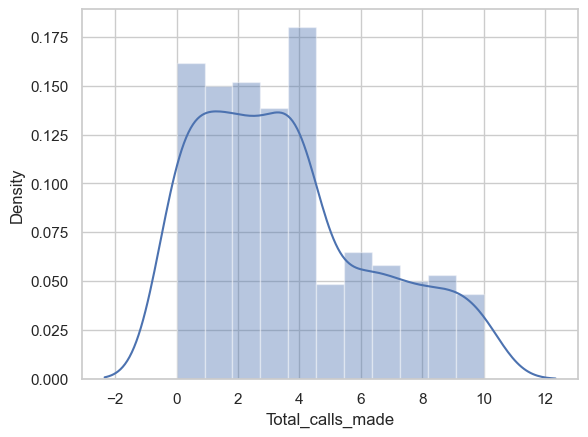

In [20]:
def distplots(col):
    sns.distplot(cred_card[col])
    plt.show()
    
for i in list(cred_card.select_dtypes(exclude=['object']).columns)[0:]:
    distplots(i)

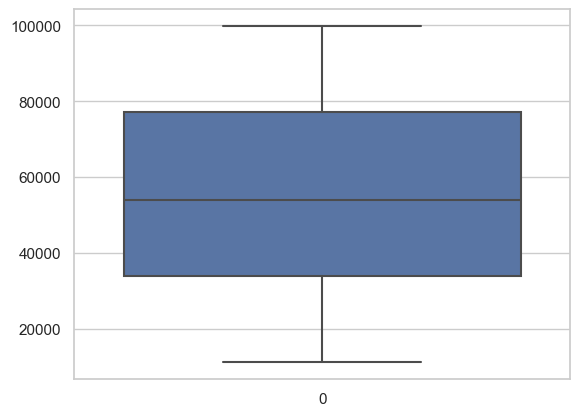

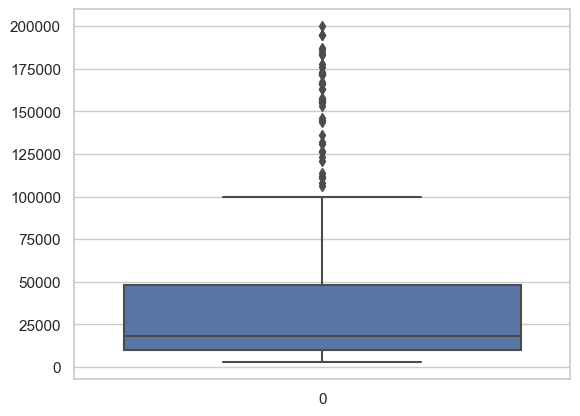

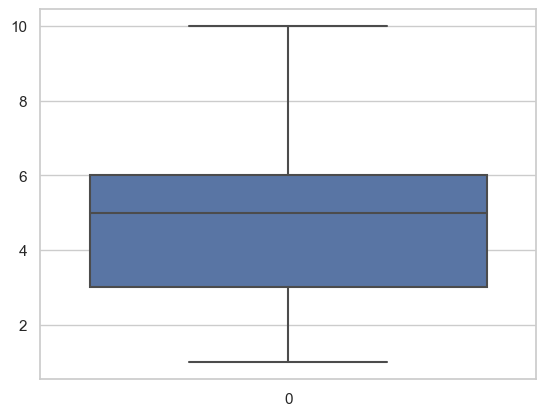

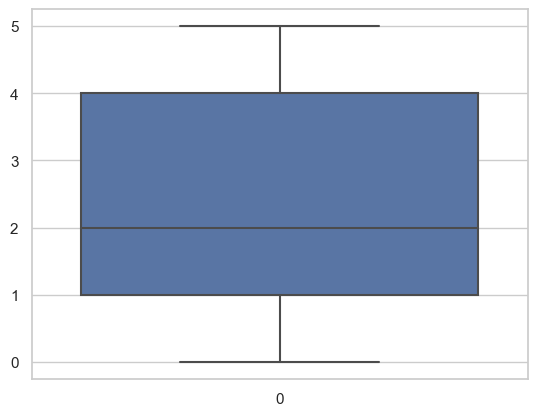

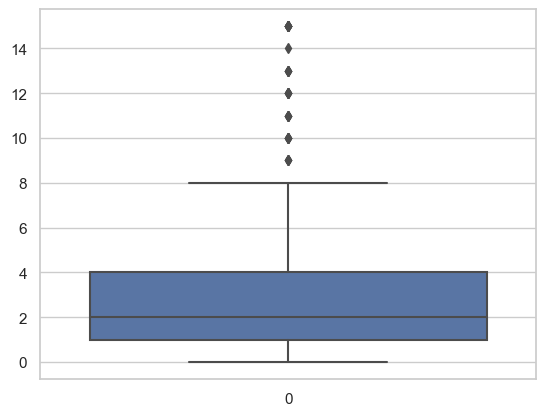

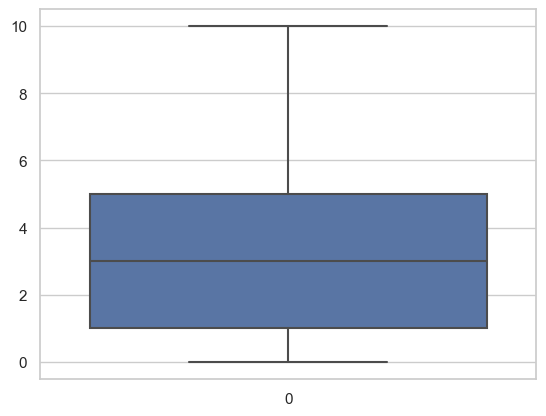

In [21]:
def boxplots(col):
    sns.boxplot(cred_card[col])
    plt.show()
    
for i in list(cred_card.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

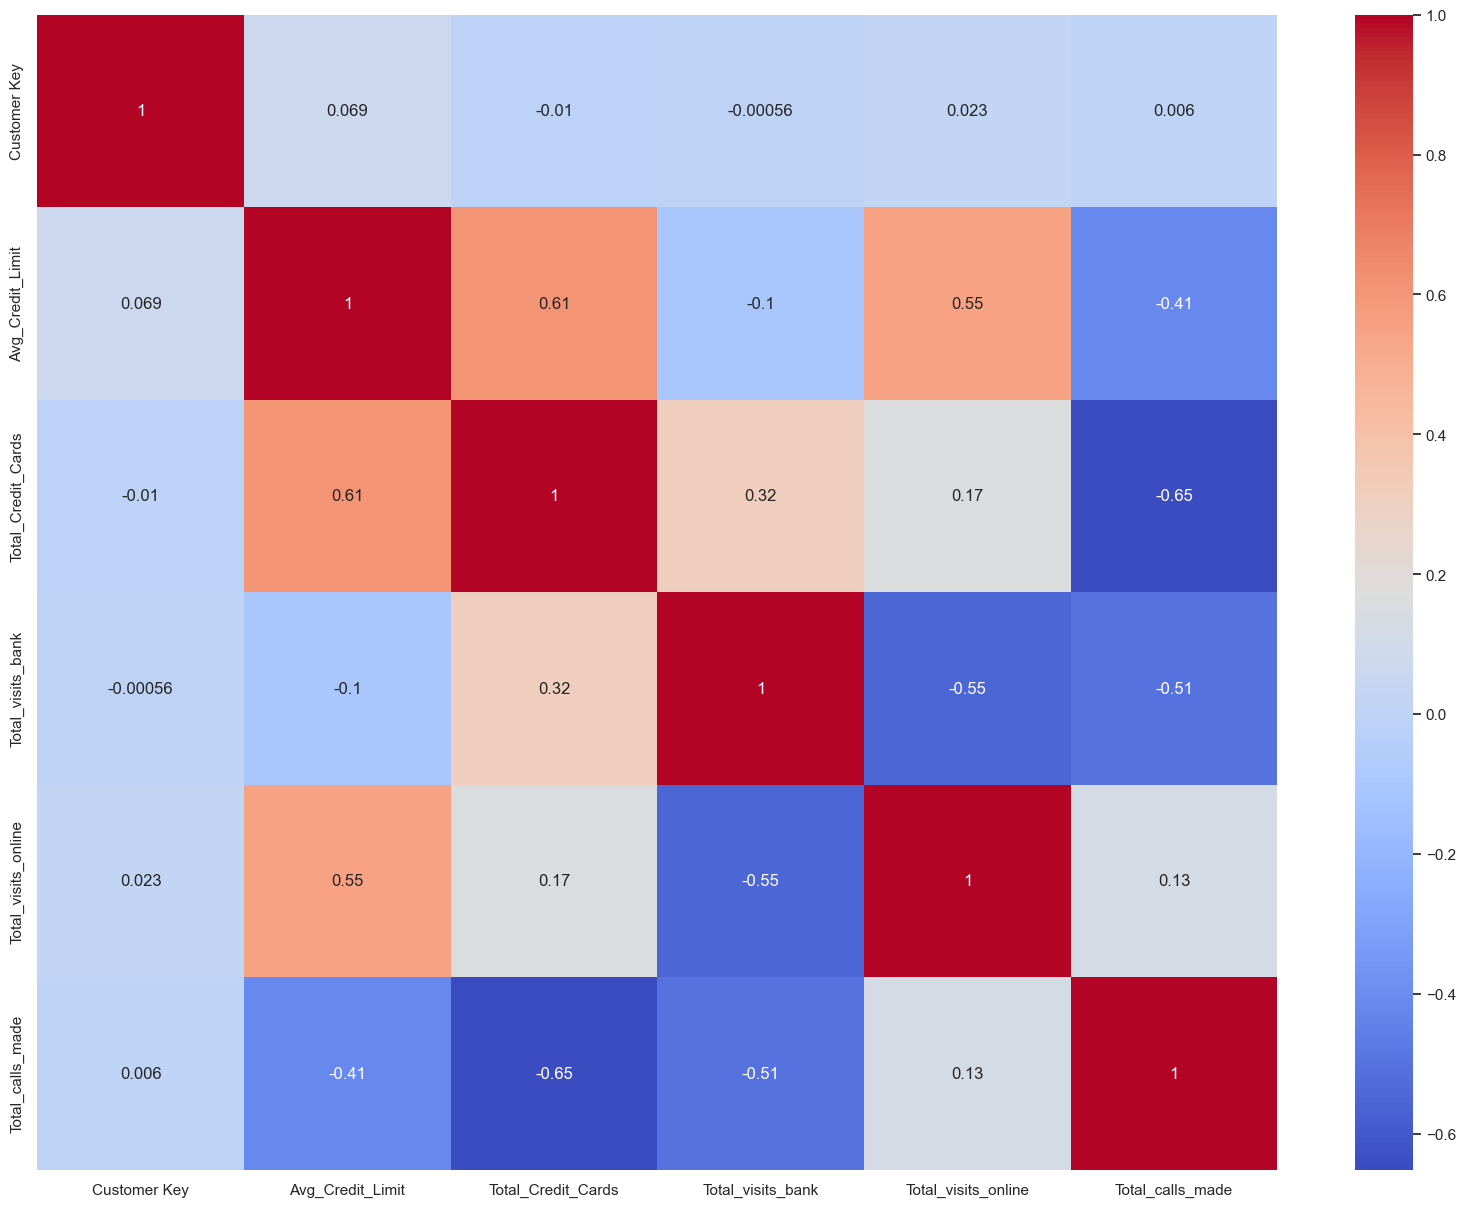

In [22]:
plt.figure(figsize=(20,15))
corr=cred_card.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [23]:
import klib

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

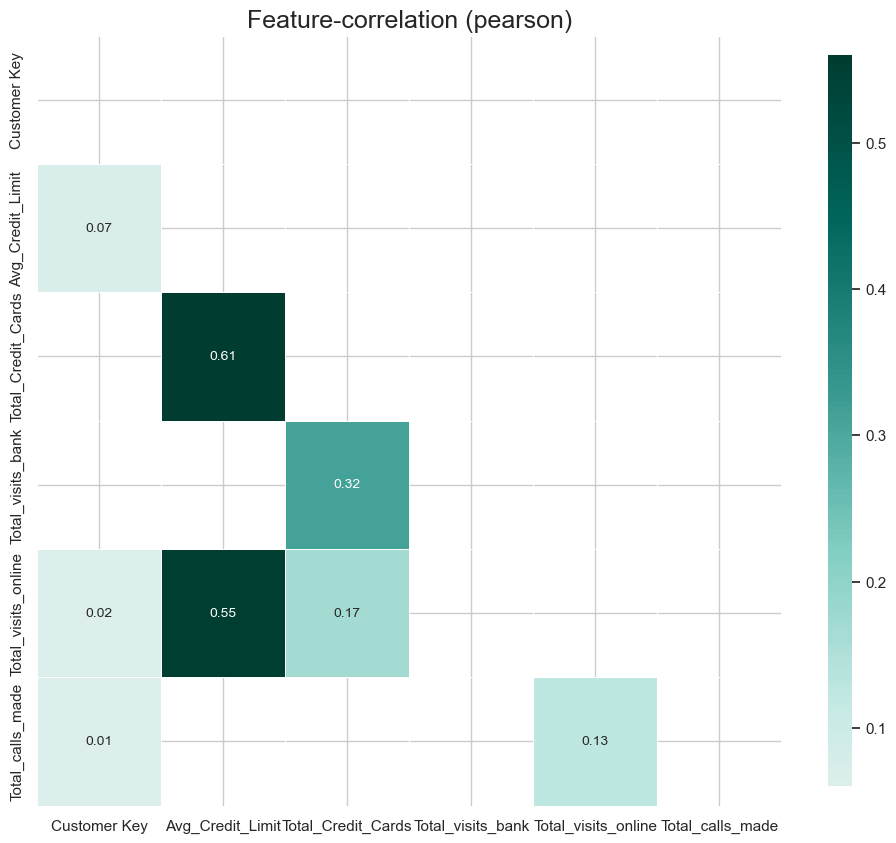

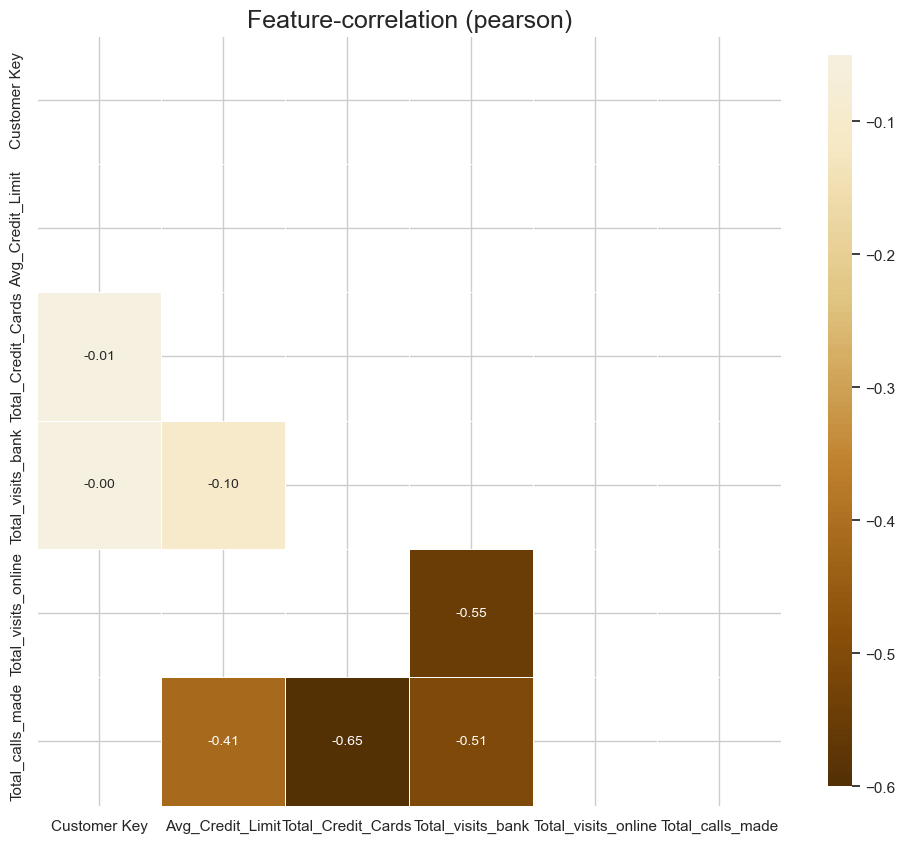

In [24]:
klib.corr_plot(cred_card ,split="pos")
klib.corr_plot(cred_card,split="neg")

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans


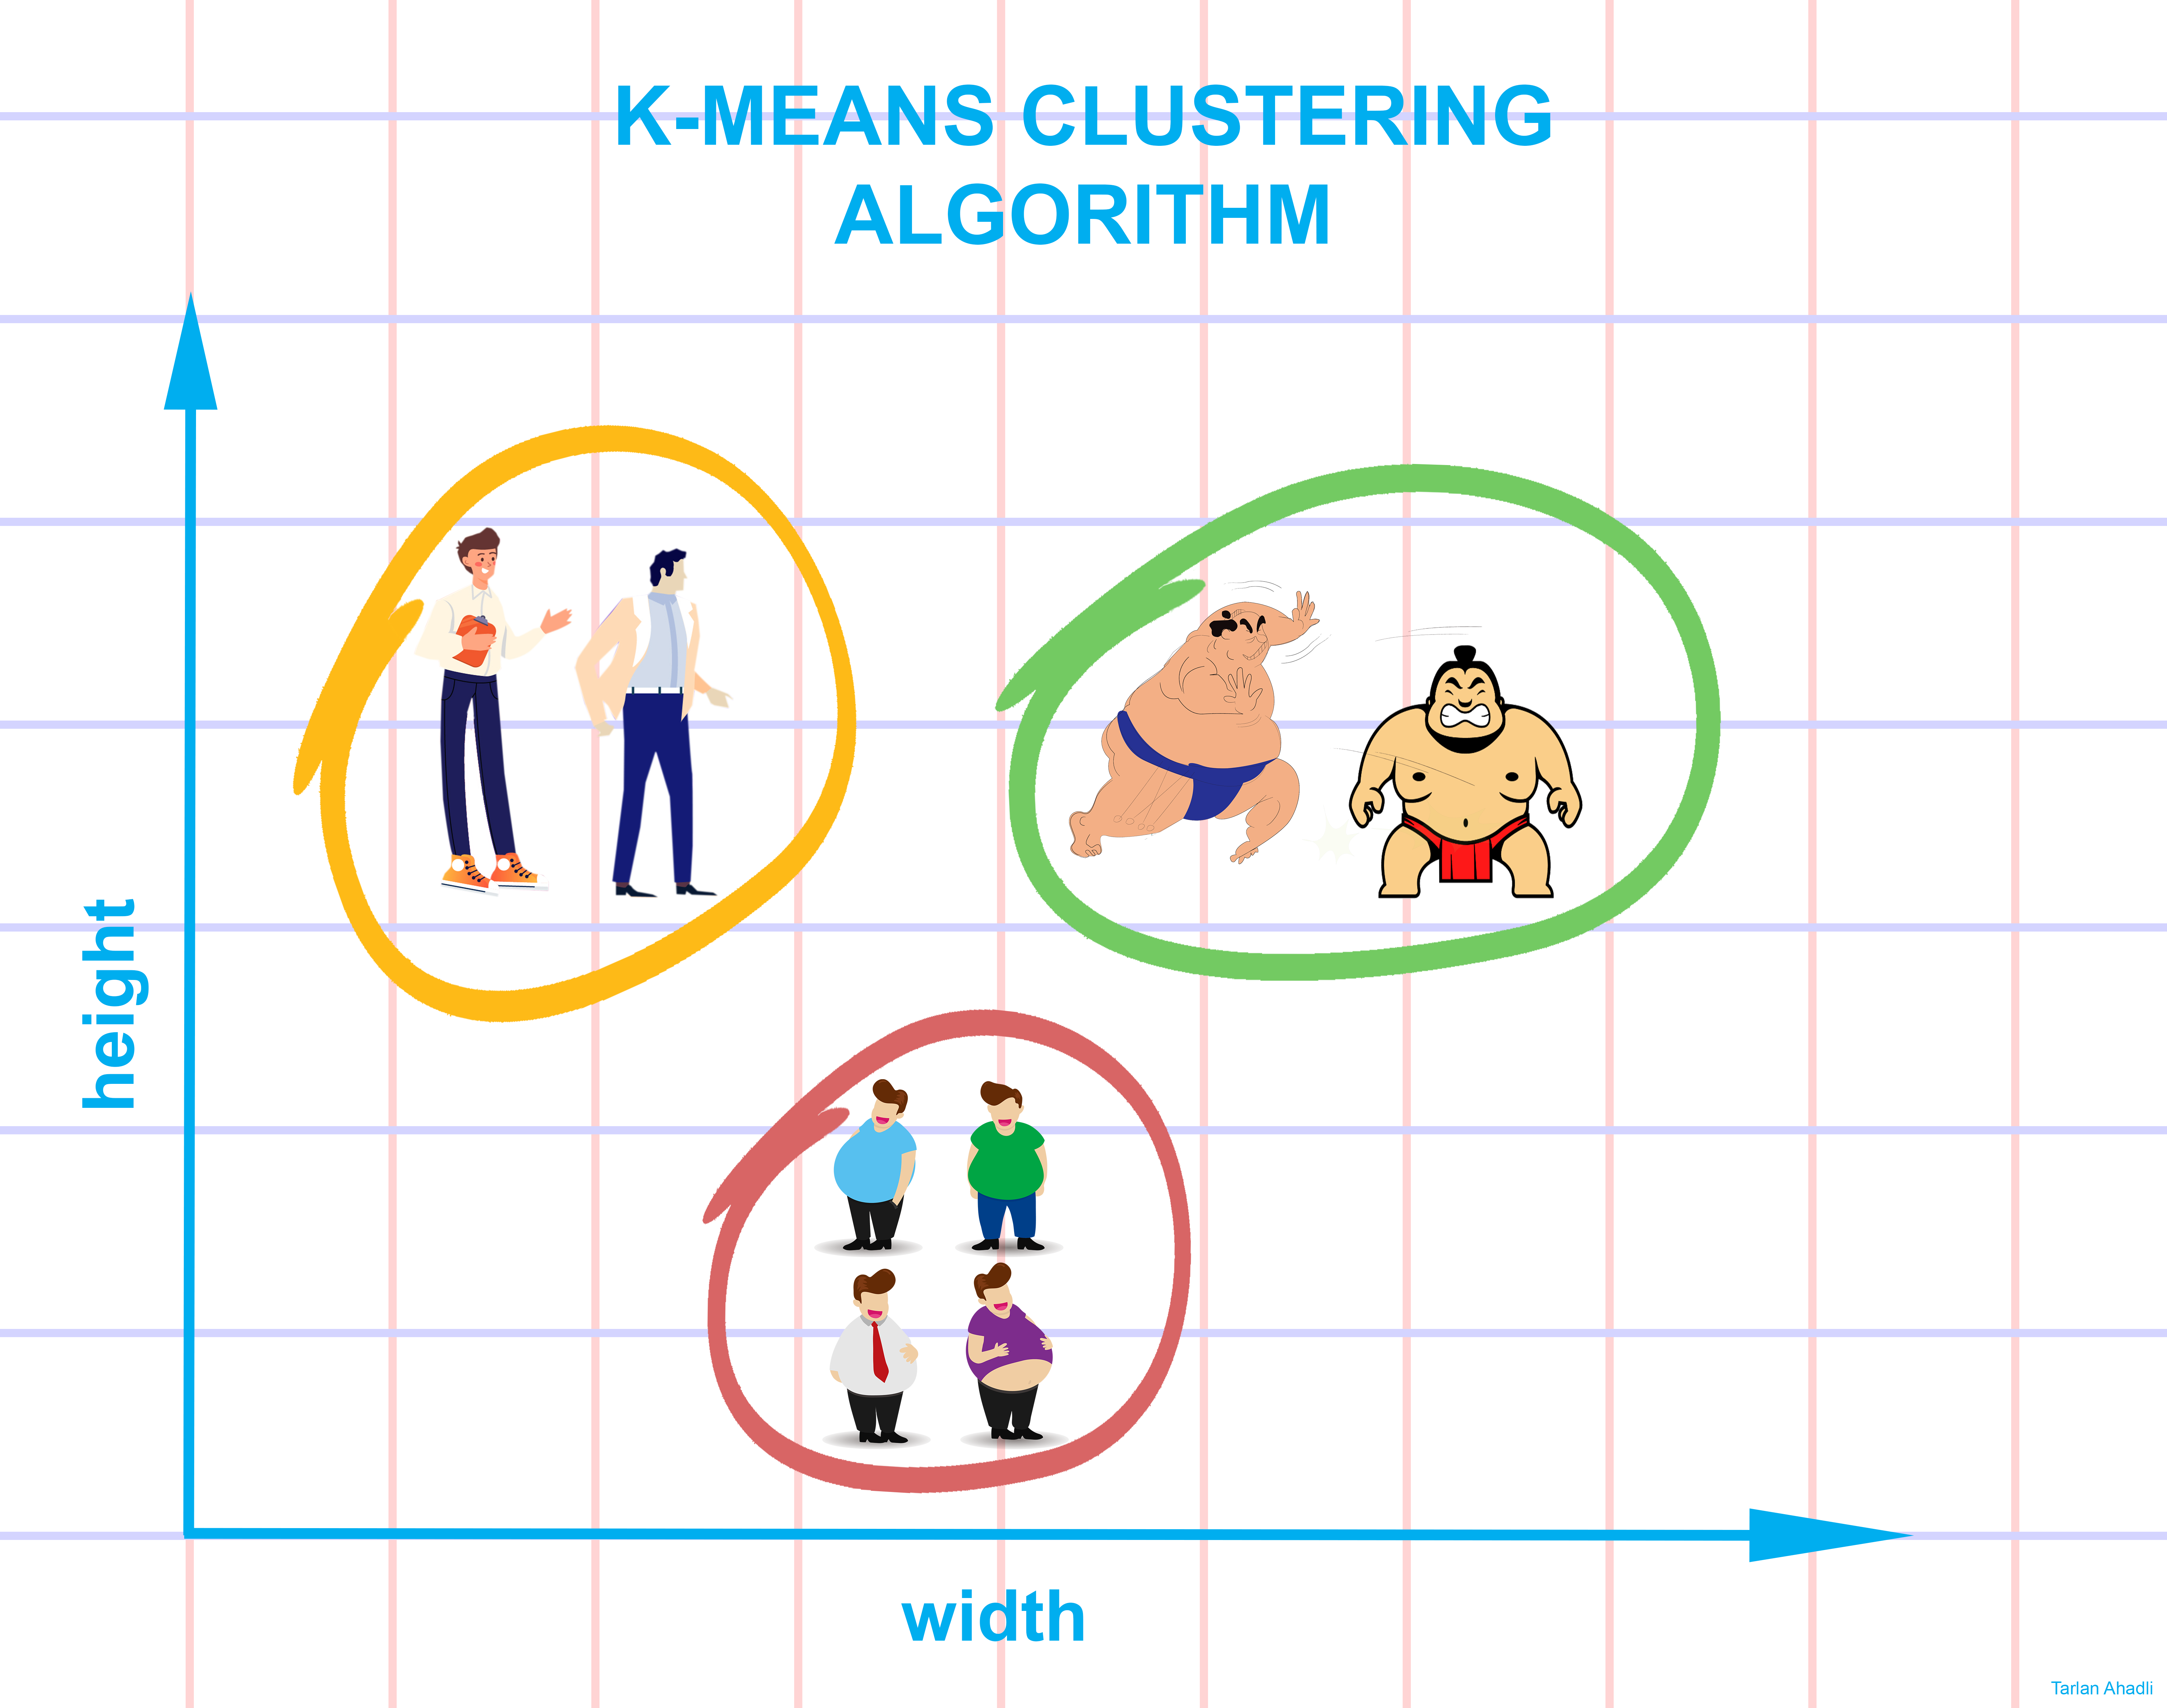

# Before Building Model we should scale the Data..Because its distance matrix and after scalling it works very effectively 

In [26]:
x=cred_card.values
x

array([[ 87073, 100000,      2,      1,      1,      0],
       [ 38414,  50000,      3,      0,     10,      9],
       [ 17341,  50000,      7,      1,      3,      4],
       ...,
       [ 53834, 145000,      8,      1,      9,      1],
       [ 80655, 172000,     10,      1,     15,      0],
       [ 80150, 167000,      9,      0,     12,      2]], dtype=int64)

In [27]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
sc_x=sc.fit_transform(x)
sc_x

array([[ 1.24691971,  1.74018685, -1.24922476, -0.86045063, -0.54748969,
        -1.25153737],
       [-0.65320273,  0.41029254, -0.78758515, -1.47373077,  2.5205186 ,
         1.89185881],
       [-1.47609839,  0.41029254,  1.05897329, -0.86045063,  0.13428993,
         0.1455276 ],
       ...,
       [-0.05105538,  2.93709172,  1.5206129 , -0.86045063,  2.17962879,
        -0.90227113],
       [ 0.99629832,  3.65523464,  2.44389211, -0.86045063,  4.22496765,
        -1.25153737],
       [ 0.97657819,  3.52224521,  1.9822525 , -1.47373077,  3.20229822,
        -0.55300488]])

# CASE 1:

# Modeling with 2 Features : Customer Key	, Total_Credit_Cards	

# How many cluster  needed it is calculated by Elbow Method

In [28]:
x1_train=cred_card.loc[:,['Customer Key','Total_Credit_Cards']].values

In [29]:
sc=StandardScaler()
sc_x1=sc.fit_transform(x1_train)

In [30]:
rg = range(1, 10)

sse = []
for k in rg:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(sc_x1)
    sse.append(kmeans.inertia_)  

Centroid Value

In [31]:
sse

[1320.0,
 830.629916286621,
 542.5594849380353,
 380.29012624733514,
 321.9151178072425,
 269.0611547912842,
 230.80598725617574,
 196.51366265240338,
 164.45498007229156]

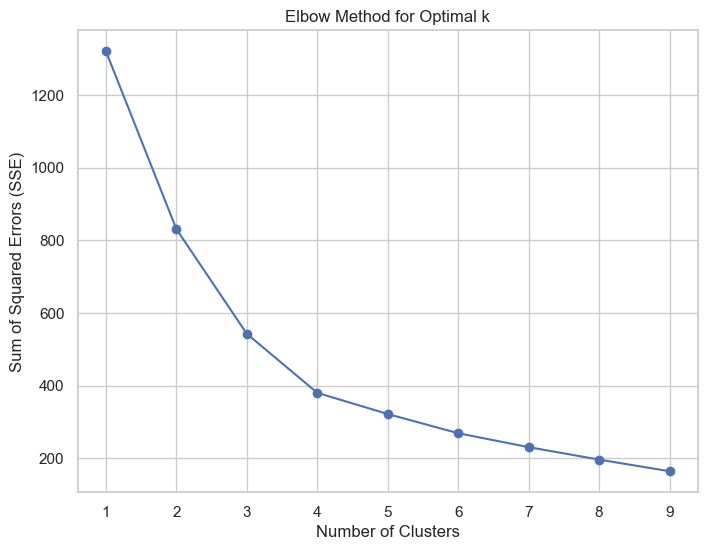

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(rg, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Basis the elbow method , we can say K = 5

In [33]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(sc_x1)
labels=kmeans.labels_
labels

array([3, 0, 4, 2, 4, 2, 2, 0, 3, 2, 2, 2, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3,
       0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2, 0, 3, 0, 2, 0,
       2, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 2, 0,
       0, 2, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 2,
       3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 3, 0, 3, 2, 3, 2, 3, 2, 0, 3, 3, 3, 0, 3, 3, 3, 2,
       3, 0, 0, 3, 0, 3, 3, 3, 3, 2, 2, 0, 3, 0, 0, 2, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 2, 3, 0, 3, 0, 0, 3, 3, 0,
       0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 2, 0, 3, 3, 2, 0, 2, 0, 0, 3,
       3, 3, 2, 0, 3, 2, 3, 3, 4, 4, 2, 1, 1, 4, 4, 1, 4, 4, 2, 4, 2, 3,
       0, 1, 4, 3, 2, 4, 4, 4, 4, 4, 0, 4, 0, 4, 1, 4, 2, 0, 3, 4, 2, 2,
       0, 4, 1, 4, 1, 2, 2, 4, 1, 2, 4, 2, 0, 0, 1, 2, 4, 4, 1, 2, 4, 2,
       2, 1, 2, 1, 2, 1, 0, 4, 1, 4, 0, 1, 4, 1, 1,

# Evaluation for all 5 Clusters: find the silhouette score

In [34]:
silhouette_score(sc_x1, labels, random_state=1)

0.36240971927121585

In [35]:
cred_card['Cluster_KMeans_5']=labels
cred_card.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster_KMeans_5
0,87073,100000,2,1,1,0,3
1,38414,50000,3,0,10,9,0
2,17341,50000,7,1,3,4,4
3,40496,30000,5,1,1,4,2
4,47437,100000,6,0,12,3,4


In [36]:
y_kmeans =kmeans.fit_predict(sc_x1)
y_kmeans 

array([3, 0, 4, 2, 4, 2, 2, 0, 3, 2, 2, 2, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3,
       0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2, 0, 3, 0, 2, 0,
       2, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 2, 0,
       0, 2, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 2,
       3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 3, 0, 3, 2, 3, 2, 3, 2, 0, 3, 3, 3, 0, 3, 3, 3, 2,
       3, 0, 0, 3, 0, 3, 3, 3, 3, 2, 2, 0, 3, 0, 0, 2, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 2, 3, 0, 3, 0, 0, 3, 3, 0,
       0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 2, 0, 3, 3, 2, 0, 2, 0, 0, 3,
       3, 3, 2, 0, 3, 2, 3, 3, 4, 4, 2, 1, 1, 4, 4, 1, 4, 4, 2, 4, 2, 3,
       0, 1, 4, 3, 2, 4, 4, 4, 4, 4, 0, 4, 0, 4, 1, 4, 2, 0, 3, 4, 2, 2,
       0, 4, 1, 4, 1, 2, 2, 4, 1, 2, 4, 2, 0, 0, 1, 2, 4, 4, 1, 2, 4, 2,
       2, 1, 2, 1, 2, 1, 0, 4, 1, 4, 0, 1, 4, 1, 1,

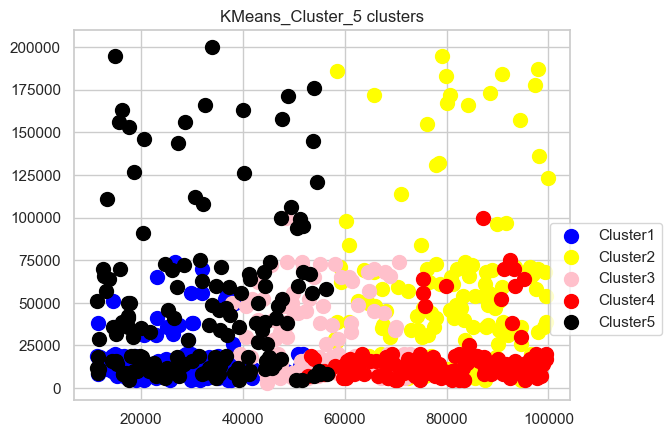

In [37]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans== 0,1], s=100, c='blue', label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans== 1,1], s=100, c='yellow', label='Cluster2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans== 2,1], s=100, c='pink', label='Cluster3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans== 3,1], s=100, c='red', label='Cluster4')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans== 4,1], s=100, c='black', label='Cluster5')
plt.title('KMeans_Cluster_5 clusters')

plt.legend(bbox_to_anchor=(1.2,0.5))
plt.show()

# Case2:
    

# Modeling with 4 Features : 
Total_Credit_Cards,	Total_visits_bank,Total_visits_online,Total_calls_made

In [38]:
x2_train=cred_card.loc[:,['Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].values

In [39]:
sc=StandardScaler()
sc_x2=sc.fit_transform(x2_train)

In [40]:
rg = range(1, 10)

sse = []
for k in rg:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(sc_x2)
    sse.append(kmeans.inertia_)   # Here inertia means its gives centroid value


In [41]:
sse

[2640.0000000000005,
 1496.25248426265,
 753.3386691428194,
 601.9629256020863,
 526.5035042772587,
 482.7414525131248,
 440.0889567129731,
 403.9468145291287,
 383.2915499474472]

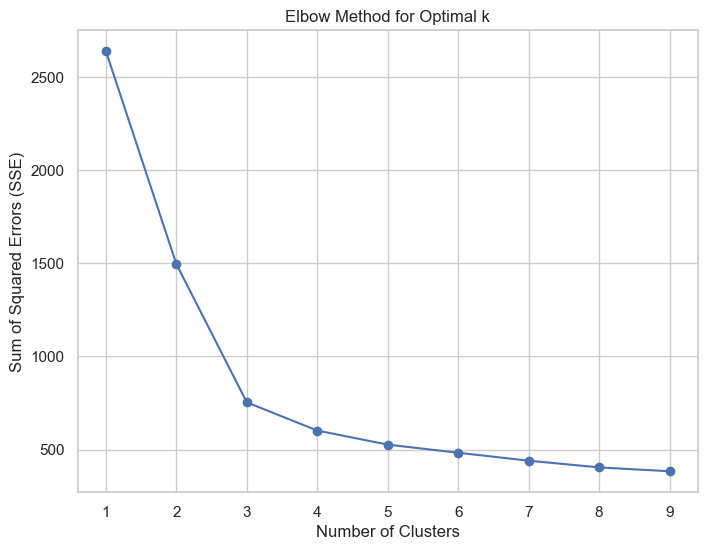

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(rg, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Basis the elbow method , we can say K = 4

In [43]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(sc_x2)
labels=kmeans.labels_


In [44]:
silhouette_score(sc_x2, labels, random_state=1)

0.38662228533763593

In [45]:
y_kmeans =kmeans.fit_predict(sc_x2)
y_kmeans 

array([3, 0, 3, 3, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,

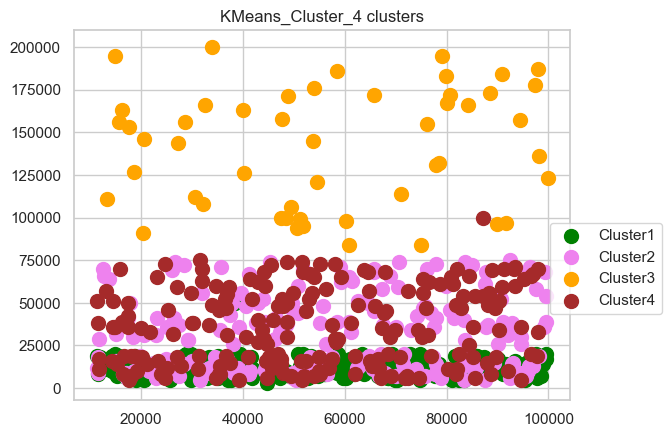

In [46]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans== 0,1], s=100, c='green', label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans== 1,1], s=100, c='violet', label='Cluster2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans== 2,1], s=100, c='orange', label='Cluster3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans== 3,1], s=100, c='brown', label='Cluster4')
plt.title('KMeans_Cluster_4 clusters')

plt.legend(bbox_to_anchor=(1.2,0.5))
plt.show()

# Case :3

# Modeling with 2 Features : Customer Key , Avg_Credit_Limit

In [47]:
x3_train=cred_card.loc[:,['Total_Credit_Cards','Avg_Credit_Limit']].values

In [48]:
sc=StandardScaler()
sc_x3=sc.fit_transform(x3_train)

In [49]:
rg = range(1, 11)

sse = []
for k in rg:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(sc_x3)
    sse.append(kmeans.inertia_) 
print(sse)

[1320.0000000000005, 698.2933315506668, 334.72447276058597, 235.38441518337885, 163.47184131176448, 128.9165543755483, 99.44071639021776, 86.1228073805054, 74.53017869818832, 67.41656644172049]


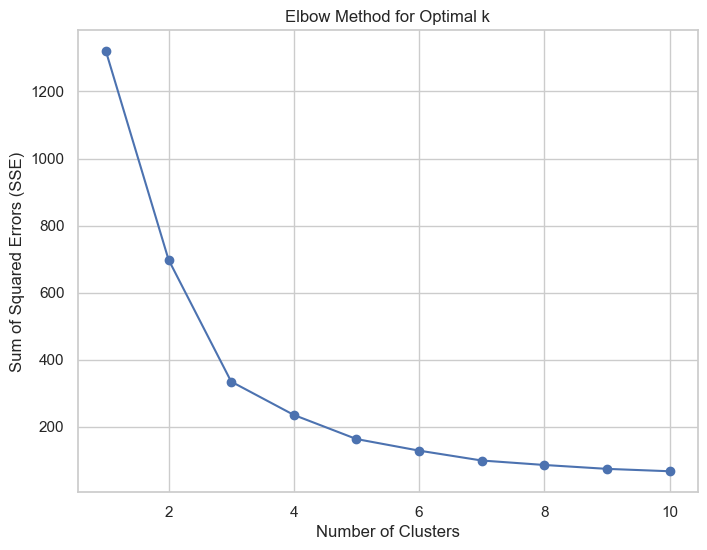

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(rg, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

#     Basis the elbow method , we can say K = 5

In [51]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(sc_x3)
labels=kmeans.labels_

In [52]:
silhouette_score(sc_x3, labels, random_state=1)

0.5022851835137387

In [53]:
y_kmeans =kmeans.fit_predict(sc_x3)
y_kmeans 

array([1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0,
       4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0,
       0, 4, 0, 0, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 4, 0, 4, 4,
       0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4,
       4, 0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 0, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4,
       4, 0, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4, 4, 0, 4, 0, 0, 0, 0, 4, 0,
       0, 4, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0,
       0, 0, 4, 0, 4, 4, 0, 0, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2,

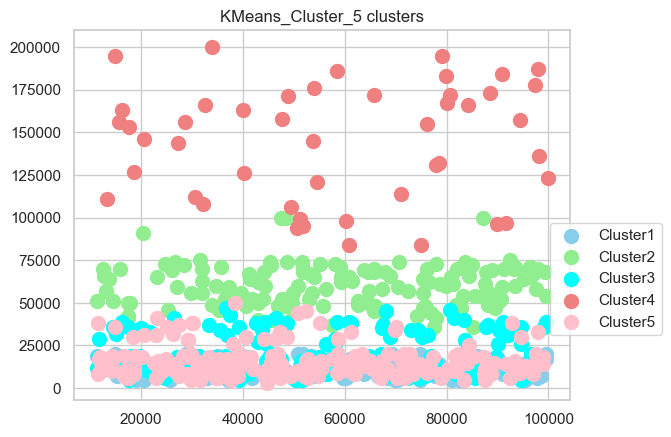

In [54]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans== 0,1], s=100, c='skyblue', label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans== 1,1], s=100, c='lightgreen', label='Cluster2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans== 2,1], s=100, c='cyan', label='Cluster3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans== 3,1], s=100, c='lightcoral', label='Cluster4')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans== 4,1], s=100, c='pink', label='Cluster5')

plt.title('KMeans_Cluster_5 clusters')

plt.legend(bbox_to_anchor=(1.2,0.5))
plt.show()

In [55]:
features=['feature_1','feature_2','feature_3']
data={'features':features, 'no_Clusters':[5,4,5],'silhouette_dist':[0.362409,0.38662,0.50228]}
silhouette_df =pd.DataFrame(data, )
silhouette_df

,features,no_Clusters,silhouette_dist
0,feature_1,5,0.362409
1,feature_2,4,0.386620
2,feature_3,5,0.502280


thank u